# ***Engr.Muhammad Javed***

## **Decision Tree Gini**

## *Importing Required Libraries*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


## *Loading the Dataset*

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')

## *Show Dataset*

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## *Viewing Statistical Summary of the Dataset*

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## *Checking Dataset Information*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## *Splitting Features and target Variable*

In [ ]:
x = data.drop(["target"] , axis = 1)
y = data["target"]

## *Spiltting Dataset into Training and testing Sets*

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split( x, y , random_state= 42 , test_size= 0.2)


## *Model Training using Decision Tree*

In [ ]:
model_gini = DecisionTreeClassifier(criterion= "gini" , min_samples_leaf= 5 , max_depth= 5 , random_state=42)
model_gini.fit(X_train , Y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
model_gini.score(X_test , Y_test)*100

85.24590163934425

## *Checking for Overfitting or Underfitting*

In [ ]:
print(model_gini.score(X_train ,Y_train)*100)
print(model_gini.score(X_test , Y_test)*100)

88.01652892561982
85.24590163934425


In [ ]:
for i in range (1,20):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train , Y_train)
    print(dt1.score(X_train , Y_train) , dt1.score(X_test , Y_test))
    


NameError: name 'DecisionTreeClassifier' is not defined

## *Making Predictions on the Dataset*

In [ ]:
y_pred_gini = model_gini.predict(X_test)

## *Evaluating Model Performance*

In [ ]:
print("GINI Tree")
print(accuracy_score(Y_test , y_pred_gini))
print(classification_report(Y_test , y_pred_gini))

GINI Tree
0.8524590163934426
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



## *Visualizing the Confusion Matrix*

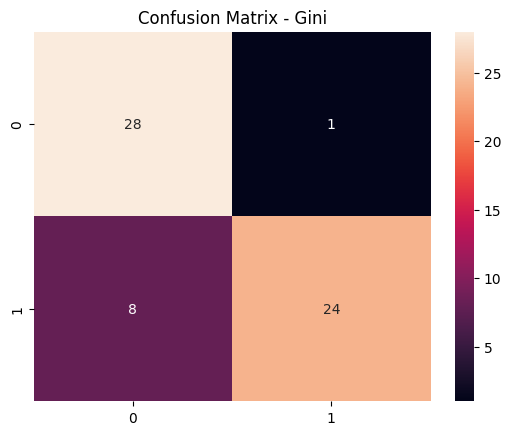

In [ ]:
plt.title("Confusion Matrix - Gini")
sn.heatmap(confusion_matrix(Y_test , y_pred_gini) , annot = True)
plt.show()

## *Visualizing the Decision Tree*

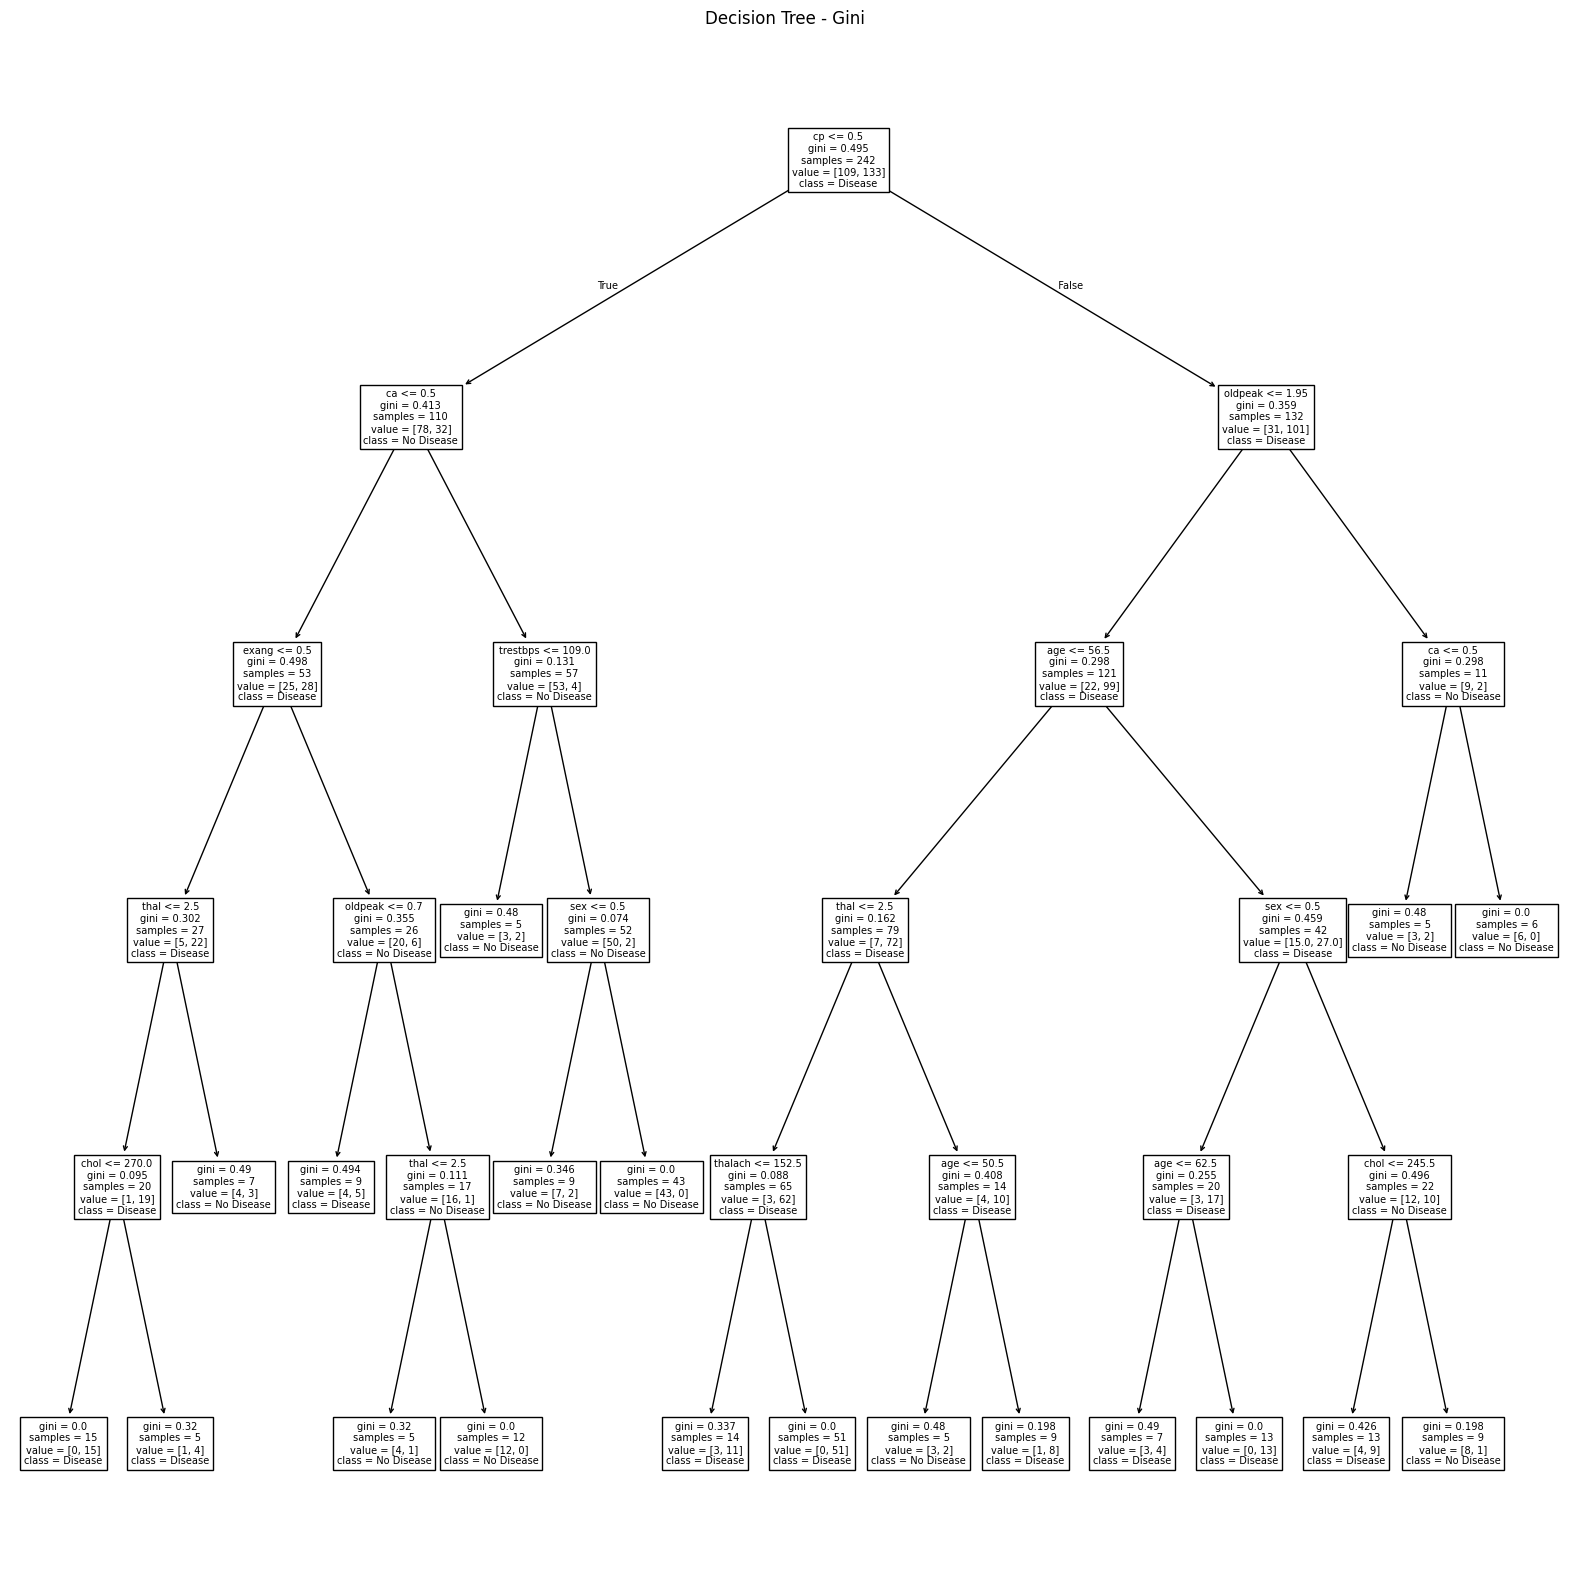

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20 , 20))
plot_tree(model_gini , feature_names=x.columns , class_names=["No Disease" , "Disease"] )
plt.title("Decision Tree - Gini")
plt.show()
plt.savefig("Decision Tree Gini.jpg")
